In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
airlines = pd.read_excel('Airlines+Data.xlsx', index_col=0, parse_dates=True)
airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


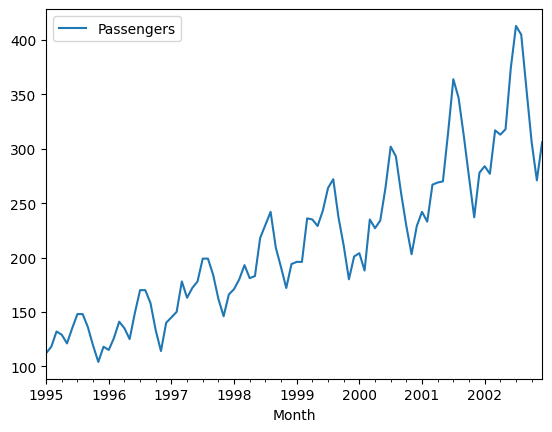

In [3]:
#Plotting a graph of the dataset
airlines.plot()
plt.show()

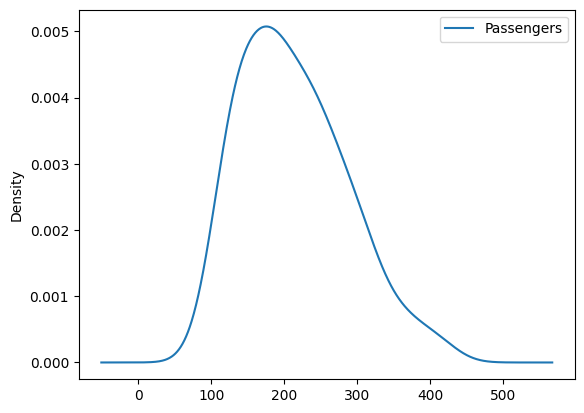

In [4]:
#plotting a density plot of the dataset
airlines.plot(kind= 'kde')
plt.show()

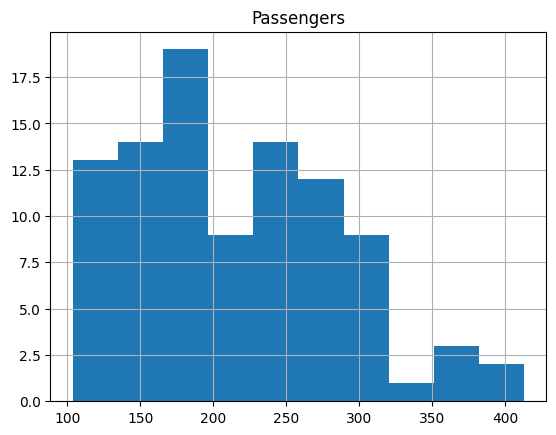

In [5]:
#plotting a histogram of the dataset
airlines.hist()
plt.show()

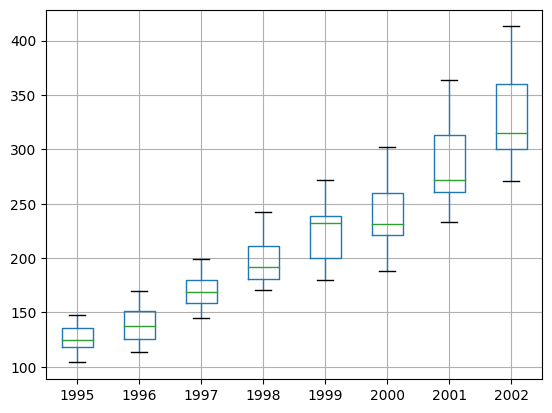

In [6]:
#plotting box plot of the dataset for each year
airlines = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
groups = airlines.groupby(pd.Grouper(freq='Y'))
years = pd.DataFrame()
for name, group in groups:
  year = name.year
  year_data = group.values.flatten()
  years[year] = year_data
years.boxplot()
plt.show()

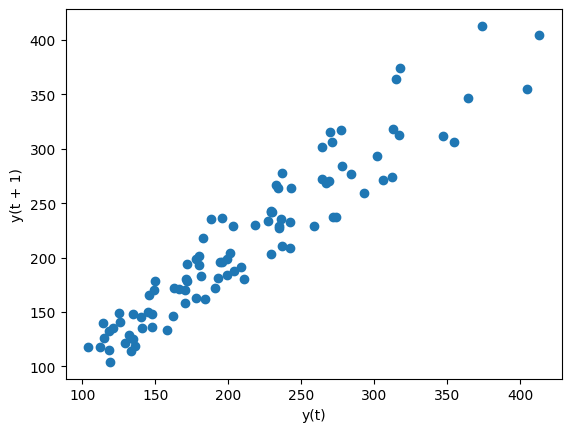

In [7]:
#plotting a lag plot
lag_plot(airlines)
plt.show()

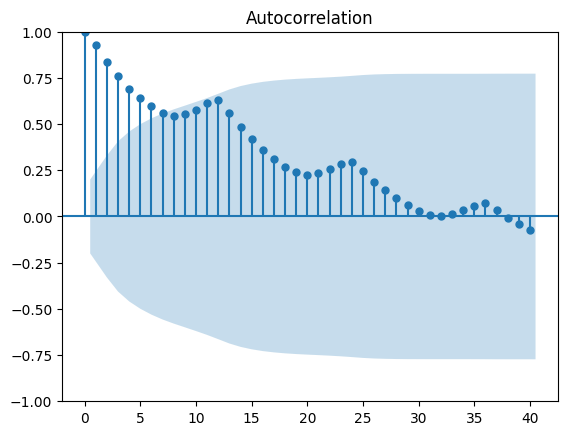

In [8]:
#plotting an acf plot of the dataset with 40 lags
plot_acf(airlines, lags= 40)
plt.show()

In [9]:
#upsampling the dataset to months
upsampled = airlines.resample('M').mean()
print(upsampled.head(20))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       148.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       118.0
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30       135.0
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31       170.0


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       148.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       118.0
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30       135.0
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31       170.0


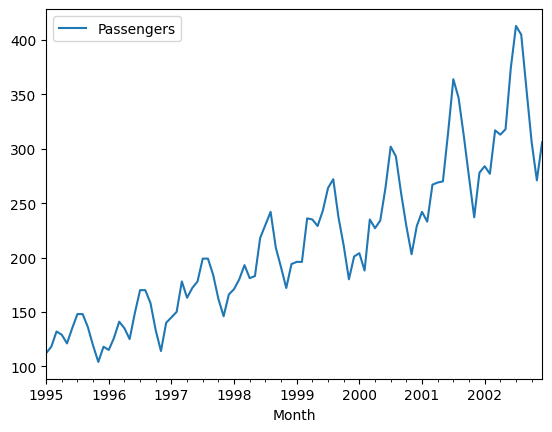

In [10]:
#interpolating the upsampled data and plot a graph
interpolated = upsampled.interpolate(method = 'linear')
print(interpolated.head(20))
interpolated.plot()
plt.show()

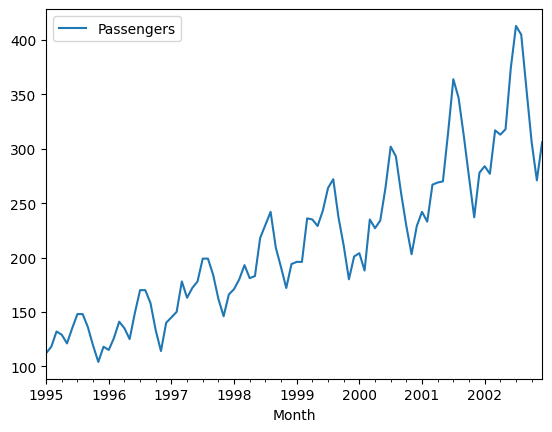

In [11]:
#comparing the upscaled the data with the original dataset
airlines.plot()
plt.show()

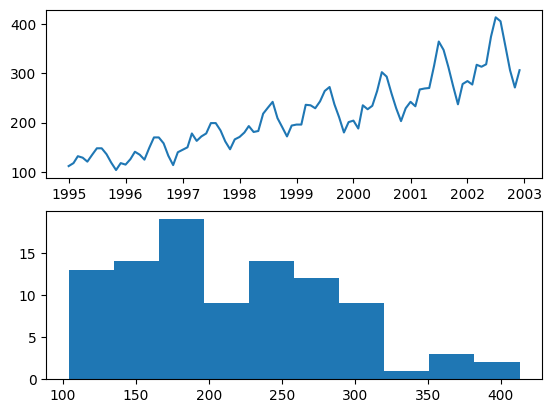

In [12]:
#plotting the distribution of the dataset to check for seasonality and trend
plt.subplot(211)
plt.plot(airlines)
plt.subplot(212)
plt.hist(airlines)
plt.show()

In [13]:
#Square Root Transformations
sqrt_trns = pd.DataFrame(airlines.values)
sqrt_trns.columns = ['passengers']
sqrt_trns['passengers'] = np.sqrt(sqrt_trns['passengers'])
sqrt_trns

,passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


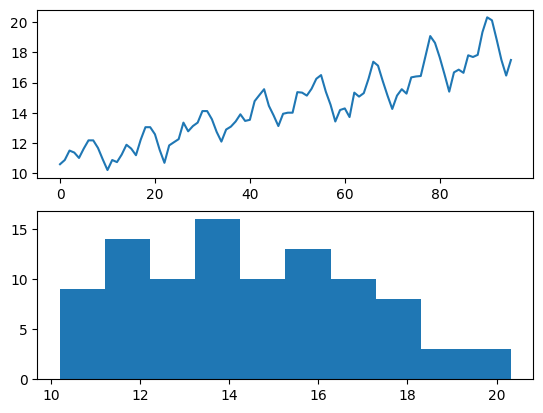

In [14]:
#plotting a graph for the transformation to check the distribution of the data
plt.subplot(211)
plt.plot(sqrt_trns)
plt.subplot(212)
plt.hist(sqrt_trns)
plt.show()

In [15]:
#Log Transformations
log_trns = pd.DataFrame(airlines.values)
log_trns.columns = ['passengers']
log_trns['passengers'] = np.log(log_trns['passengers'])
log_trns

,passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


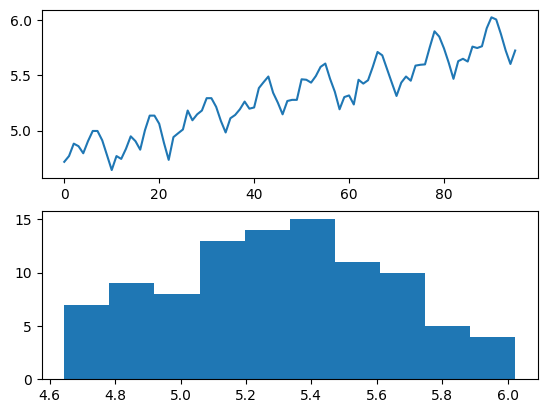

In [16]:
#plotting a graph for the transformation to check the distribution of the data
plt.subplot(211)
plt.plot(log_trns)
plt.subplot(212)
plt.hist(log_trns)
plt.show()

In [17]:
#Splitting the data into training and testing
train = interpolated.head(80)
test = interpolated.tail(16)

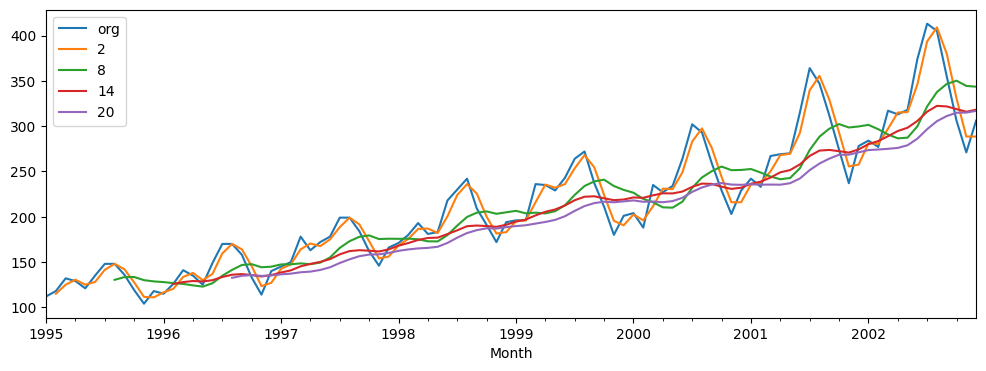

In [18]:
#plotting a moving average graph
plt.figure(figsize= (12,4))
interpolated['Passengers'].plot(label ='org')
for i in range(2,24,6):
  interpolated['Passengers'].rolling(i).mean().plot(label = str(i))
plt.legend(loc= 'best')

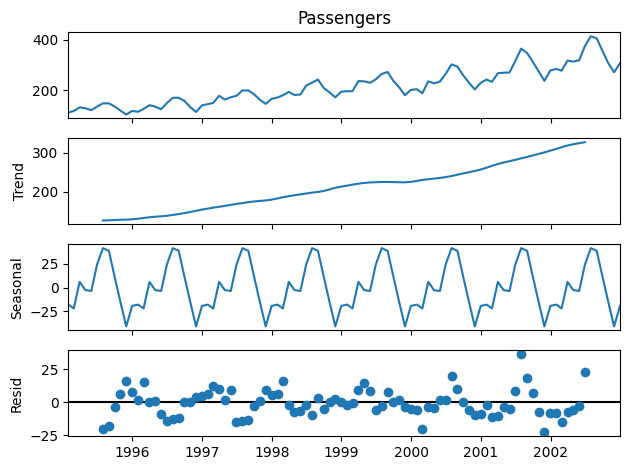

In [19]:
#ploting a decomposition graph
decompose_ts_add = seasonal_decompose(interpolated['Passengers'])
decompose_ts_add.plot()
plt.show()

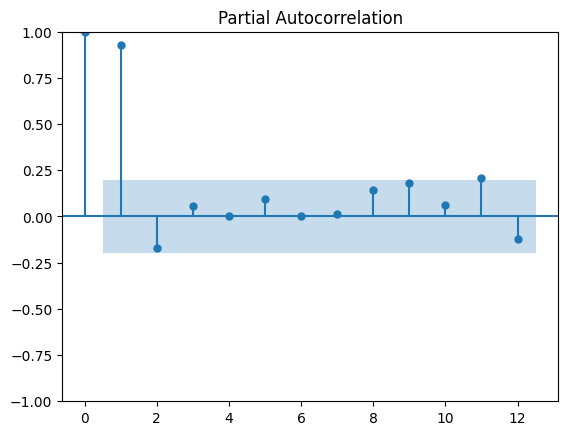

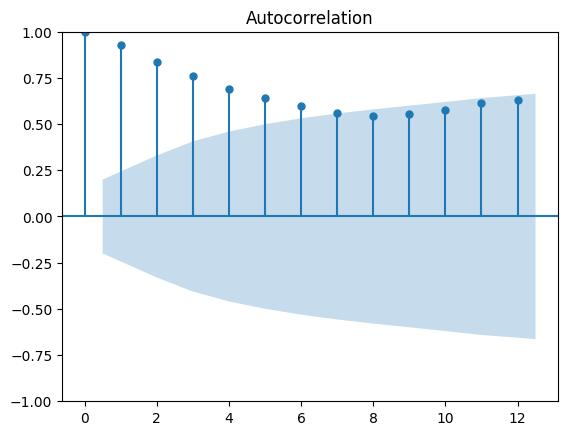

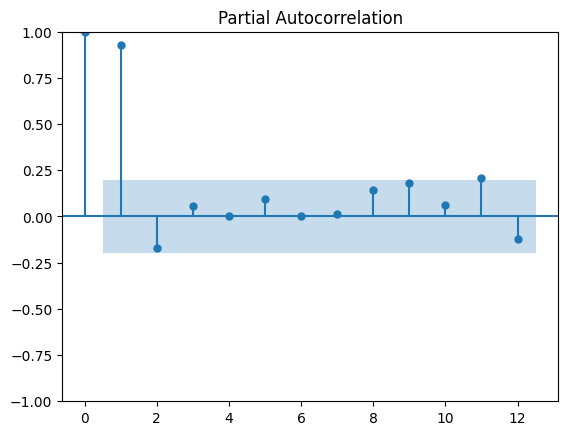

In [20]:
#plotting acf and pacf graph
plot_acf(interpolated['Passengers'], lags=12)
plot_pacf(interpolated['Passengers'], lags=12)

In [21]:
#defining a user function to calculate Mean Absolute Percentage Error
def MAPE(pred, org):
  temp = np.abs((pred-org)/org)*100
  return np.mean(temp)

In [22]:
#Building a Simple Exponential Smoothing model and printing the RMSE Value and MAPE values
ses_model = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
print(f"Mean Absoulute Error : {MAPE(pred_ses, test.Passengers)}")
rmse_ses_model = np.sqrt(mean_squared_error(test.Passengers, pred_ses))
print(f"RMSE for Simple Exponential Model is : {rmse_ses_model}")

Mean Absoulute Error : 11.375850565189536
RMSE for Simple Exponential Model is : 50.85821670891308


In [23]:
#Building a Holt Smoothing model and printing the RMSE Value and MAPE values
hw_model = Holt(train['Passengers']).fit(smoothing_level = 0.2)
pred_hw = hw_model.predict(start =test.index[0], end = test.index[-1])
print(f"Mean Absoulute Error : {MAPE(pred_hw, test.Passengers)}")
rmse_hw_model = np.sqrt(mean_squared_error(test.Passengers, pred_hw))
print(f"RMSE for Holt Exponential Model is : {rmse_hw_model}")

Mean Absoulute Error : 14.437663760611425
RMSE for Holt Exponential Model is : 49.944876166922555


In [24]:
#Building a Simple Exponential Smoothing model with additive seasonality and additive trend and printing the RMSE Value and MAPE values
hw_model_add_add = ExponentialSmoothing(train['Passengers'], seasonal='add', trend = 'add', seasonal_periods = 12).fit(smoothing_level = 0.20)
pred_hw_add_add = hw_model_add_add.predict(start = test.index[0], end = test.index[-1])
print(f"Mean Absoulute Error : {MAPE(pred_hw_add_add, test.Passengers)}")
rmse_hw_model_add_add = np.sqrt(mean_squared_error(test.Passengers, pred_hw_add_add))
print(f"RMSE for Simple Exponential Model with additive seasonality and additive trend is : {rmse_hw_model_add_add}")

Mean Absoulute Error : 4.236493478951465
RMSE for Simple Exponential Model with additive seasonality and additive trend is : 17.928336139481623


In [27]:
#Building a Simple Exponential Smoothing model with multiplicative seasonality and additive trend and printing the RMSE Value and MAPE values
hw_model_mul_add = ExponentialSmoothing(train['Passengers'], seasonal='mul', trend = 'add', seasonal_periods = 12).fit(smoothing_level = 0.20)
pred_hw_mul_add = hw_model_mul_add.predict(start = test.index[0], end = test.index[-1])
print(f"Mean Absoulute Error : {MAPE(pred_hw_mul_add, test.Passengers)}")
rmse_hw_model_mul_add = np.sqrt(mean_squared_error(test.Passengers, pred_hw_mul_add))
print(f"RMSE for Simple Exponential Model with multiplicative seasonality and additive trend is : {rmse_hw_model_mul_add}")

Mean Absoulute Error : 6.180209136235432
RMSE for Simple Exponential Model with multiplicative seasonality and additive trend is : 22.70165778640145


In [28]:
hwe_model_add_add = ExponentialSmoothing(interpolated['Passengers'], seasonal = 'add', trend ='add', seasonal_periods = 12).fit()

In [29]:
#Forecasting for the next 12 periods
hwe_model_add_add.forecast(10)

2003-01-31    319.235270
2003-02-28    311.528386
2003-03-31    350.278691
2003-04-30    346.984976
2003-05-31    351.845022
2003-06-30    403.925707
2003-07-31    440.566797
2003-08-31    427.446477
2003-09-30    376.628169
2003-10-31    329.767502
Freq: M, dtype: float64

In [30]:
#Copy the dataset to a new variable
new_df = interpolated.copy()

In [31]:
#Resetting the index values
new_df.reset_index(inplace= True)

In [32]:
#Adding t variable to the dataframe
new_df['t'] = 1
new_df

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1
94,2002-11-30,271.0,1


In [33]:
#assigning new values to t variables
for i, row in new_df.iterrows():
  new_df['t'].iloc[i] = i+1
new_df

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94
94,2002-11-30,271.0,95


In [34]:
#Adding log passengers column with logarithmic value of the passenger column
new_df['log_passengers'] = np.log(new_df['Passengers'])
new_df

,Month,Passengers,t,log_passengers
0,1995-01-31,112.0,1,4.718499
1,1995-02-28,118.0,2,4.770685
2,1995-03-31,132.0,3,4.882802
3,1995-04-30,129.0,4,4.859812
4,1995-05-31,121.0,5,4.795791
...,...,...,...,...
91,2002-08-31,405.0,92,6.003887
92,2002-09-30,355.0,93,5.872118
93,2002-10-31,306.0,94,5.723585
94,2002-11-30,271.0,95,5.602119


In [35]:
#aading the t_sq column with square of values from t column
new_df['t_sq'] = new_df['t']**2
new_df

,Month,Passengers,t,log_passengers,t_sq
0,1995-01-31,112.0,1,4.718499,1
1,1995-02-28,118.0,2,4.770685,4
2,1995-03-31,132.0,3,4.882802,9
3,1995-04-30,129.0,4,4.859812,16
4,1995-05-31,121.0,5,4.795791,25
...,...,...,...,...,...
91,2002-08-31,405.0,92,6.003887,8464
92,2002-09-30,355.0,93,5.872118,8649
93,2002-10-31,306.0,94,5.723585,8836
94,2002-11-30,271.0,95,5.602119,9025


In [36]:
#adding the month and year column to the dataset
new_df['month'] = new_df.Month.dt.strftime('%b')
new_df['year'] = new_df.Month.dt.strftime('%Y')
new_df

,Month,Passengers,t,log_passengers,t_sq,month,year
0,1995-01-31,112.0,1,4.718499,1,Jan,1995
1,1995-02-28,118.0,2,4.770685,4,Feb,1995
2,1995-03-31,132.0,3,4.882802,9,Mar,1995
3,1995-04-30,129.0,4,4.859812,16,Apr,1995
4,1995-05-31,121.0,5,4.795791,25,May,1995
...,...,...,...,...,...,...,...
91,2002-08-31,405.0,92,6.003887,8464,Aug,2002
92,2002-09-30,355.0,93,5.872118,8649,Sep,2002
93,2002-10-31,306.0,94,5.723585,8836,Oct,2002
94,2002-11-30,271.0,95,5.602119,9025,Nov,2002


In [37]:
#getting dummies columns for months and storing it in a varibale
months = pd.get_dummies(new_df['month'])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
  #ordering the month column
  months[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0


In [39]:
#adding the months variable to the dataset
Airlines = pd.concat([new_df, months], axis =1)
Airlines

,Month,Passengers,t,log_passengers,t_sq,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-31,112.0,1,4.718499,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4.770685,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,4.882802,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-30,129.0,4,4.859812,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,4.795791,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-31,405.0,92,6.003887,8464,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-30,355.0,93,5.872118,8649,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-31,306.0,94,5.723585,8836,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-30,271.0,95,5.602119,9025,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


<Axes: xlabel='month', ylabel='year'>

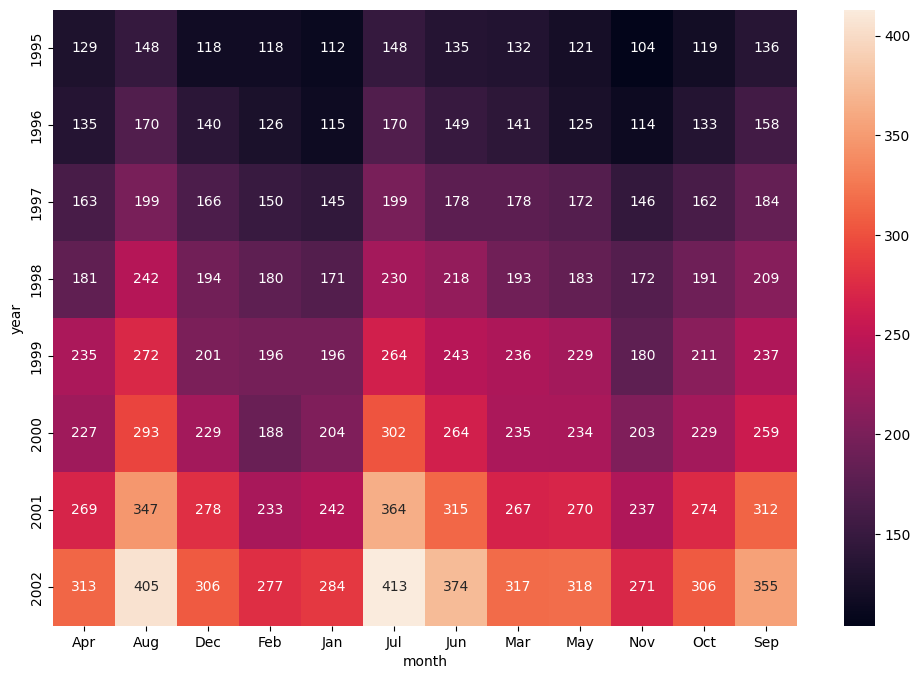

In [40]:
#plotting a heatmap of the dataset
plt.figure(figsize = (12,8))
heatmap_y_month = pd.pivot_table(data= Airlines, values = 'Passengers', index = 'year', columns = 'month', aggfunc = 'mean', fill_value=0)
sns.heatmap(heatmap_y_month, annot = True, fmt = 'g')

In [41]:
#Splitting the data into training and testing
Train = Airlines.head(80)
Test = Airlines.tail(16)

In [42]:
Train.head()

,Month,Passengers,t,log_passengers,t_sq,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-31,112.0,1,4.718499,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4.770685,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,4.882802,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-30,129.0,4,4.859812,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,4.795791,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
#linear_model
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t', data = Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726805

In [44]:
#Exponential
Exp = smf.ols('log_passengers~t', data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

In [45]:
#Quadratic
Quad = smf.ols('Passengers~t+t_sq', data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['t', 't_sq']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584204

In [46]:
#Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.2664764144331

In [47]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570105426

In [48]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621102

In [49]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.46900023030625

In [50]:
#Compareing the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea",'rmse_ses_model','rmse_hw_model','rmse_hw_model_add_add','rmse_hw_model_mul_add']),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_ses_model,rmse_hw_model,rmse_hw_model_add_add,rmse_hw_model_mul_add])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
9,rmse_hw_model_add_add,17.928336
10,rmse_hw_model_mul_add,22.701658
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
8,rmse_hw_model,49.944876
7,rmse_ses_model,50.858217
3,rmse_add_sea,129.266476


In [51]:
#As the RMSE values is the lowest for Multiplicative Trend and additive seasonalty therefore this model will be preffered over the other models in analysis